In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import randn
%matplotlib inline

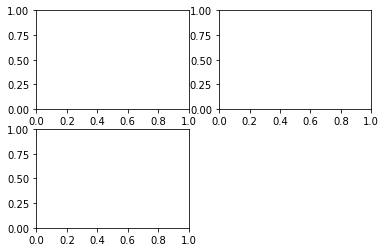

In [27]:
fig = plt.figure()
#此处编号从1开始
axl = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.show()

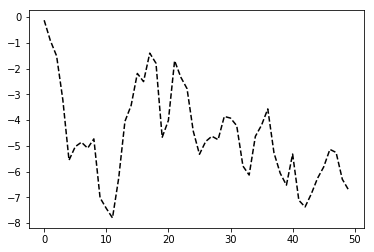

In [15]:
plt.plot(randn(50).cumsum(), 'k--')
plt.show()

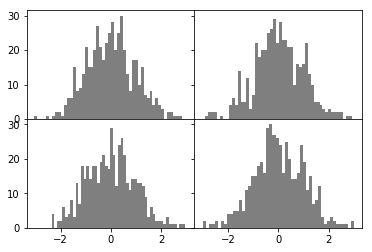

In [30]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins = 50, color = 'k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)

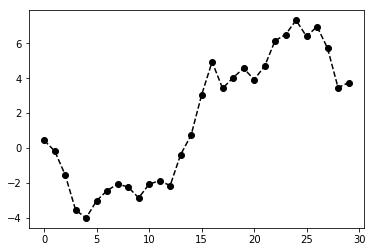

In [34]:
plt.plot(randn(30).cumsum(), 'ko--')

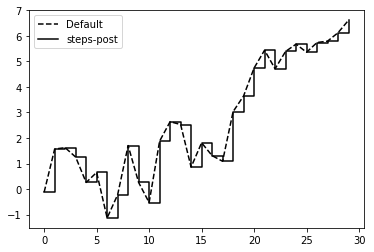

In [76]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label = 'Default')
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

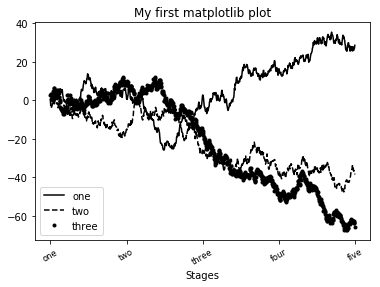

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize = 'small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best')

(5472,)


Text(0.5,1,'Important dates in 2008-2009 financial crisis')

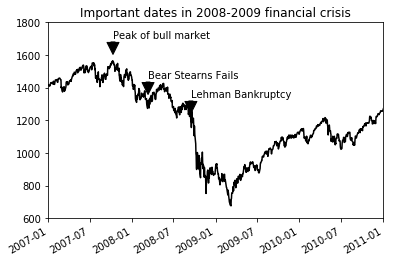

In [2]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('D://datasets//python_for_data_analysis//examples//spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']
print(spx.shape)
      
spx.plot(ax = ax, style = 'k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 50),
                xytext = (date, spx.asof(date) + 200),
                arrowprops = dict(facecolor = 'black'),
                horizontalalignment = 'left', verticalalignment = 'top')

#放大到2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

0     1.206381
10    0.257105
20   -0.256692
30    0.081343
40   -0.817819
50   -1.724612
60   -1.112117
70    0.066169
80    0.766032
90    1.438524
dtype: float64


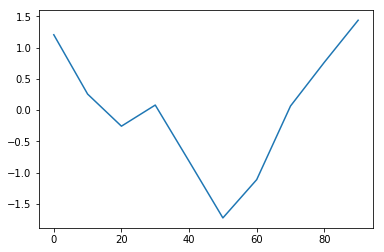

In [17]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
print(s)
s.plot()

           A         B         C         D
0  -0.941520 -1.676032 -0.945241 -1.420958
10 -0.119491 -0.488707 -0.854680 -1.711617
20  1.265396 -0.206007 -2.099584 -1.127850
30  1.746889  1.751463 -4.208344 -1.765263
40  1.288264  1.448073 -5.098332 -1.324381
50  0.376272  0.589800 -4.292587 -1.007123
60  1.837926 -0.556967 -4.373823 -1.921902
70  2.218561  0.592794 -4.387406 -0.719452
80  3.169738 -1.096010 -4.438868  0.781006
90  4.624536 -1.727723 -5.262665  2.069749


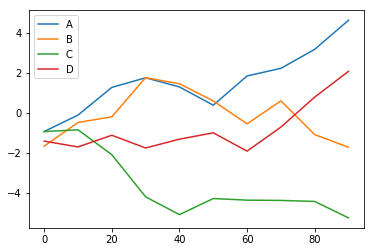

In [19]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns = ['A', 'B', 'C', 'D'],
                 index = np.arange(0, 100, 10))
print(df)
df.plot()

In [22]:
data = pd.read_csv('D://datasets//python_for_data_analysis//datasets//haiti//Haiti.csv')
print(data.shape)
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][: 10]

(3593, 10)


,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [18]:
data['CATEGORY'][: 6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [20]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [44]:
#移除错误数据与空值
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < - 70)
             & data.CATEGORY.notnull()]
data.shape

(3569, 10)

In [45]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


In [34]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [40]:
all_cats = get_all_categories(data.CATEGORY)

#生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)

english_mapping['2']

'Vital Lines'

In [54]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))), index = data.index, columns = code_index)

dummy_frame.describe()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
count,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,...,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0,3569.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

data.iloc[:, 10 : 15]

ValueError: columns overlap but no suffix specified: Index(['category_1', 'category_1a', 'category_1b', 'category_1c',
       'category_1d', 'category_2', 'category_2a', 'category_2b',
       'category_2c', 'category_2d', 'category_2e', 'category_2f',
       'category_3', 'category_3a', 'category_3b', 'category_3c',
       'category_3d', 'category_3e', 'category_4', 'category_4a',
       'category_4c', 'category_4e', 'category_5', 'category_5a',
       'category_5b', 'category_5c', 'category_5d', 'category_5e',
       'category_6', 'category_6a', 'category_6b', 'category_6c', 'category_7',
       'category_7a', 'category_7b', 'category_7c', 'category_7d',
       'category_7g', 'category_7h', 'category_8', 'category_8a',
       'category_8c', 'category_8d', 'category_8e', 'category_8f'],
      dtype='object')

In [63]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
def basic_haiti_map( ax= None, lllat= 17.25, urlat= 20.5, lllon=-75, urlon=-1): 
    # 创建 极 球面 投影 的 Basemap 实例。 
    m = Basemap( ax= ax, projection='stere',
                lon_0=( urlon + lllon) / 2,
                lat_0=( urlat + lllat) / 2,
                llcrnrlat= lllat, urcrnrlat= urlat,
                llcrnrlon= lllon, urcrnrlon= urlon,
                resolution='f') 
    # 绘制 海岸线、 州 界、 国界 以及 地图 边界。
    m.drawcoastlines()
    m.drawstates() 
    m.drawcountries() 
    return m

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
fig, axes = plt.subplots( nrows= 2, ncols= 2, figsize=( 12, 10)) 
fig.subplots_adjust( hspace= 0.05, wspace= 0.05)
to_plot = ['2a', '1', '3c', '7a']
lllat= 17.25; urlat= 20.25; lllon=-75; urlon=-71 
for code, ax in zip(to_plot, axes.flat): 
    m = basic_ haiti_map( ax, lllat= lllat, urlat= urlat, lllon= lllon, urlon= urlon)
    
    cat_data = data[ data['category_% s' % code] == 1]
    # 计算 地图 的 投影 坐标。 　 　 
    x, y = m(cat_data.LONGITUDE, cat_data.LATITUDE)
    m.plot( x, y, 'k.', alpha= 0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))
